In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing libraries 

## 1.Load the dataset into python environment


In [147]:
data=pd.read_csv('titanic_dataset.csv')

In [148]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***

## 2.Make ‘PassengerId’ as the index column

In [149]:
data=data.set_index('PassengerId')

In [150]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***

## 3.Check the basic details of the dataset

In [151]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
data.shape

(891, 11)

In [153]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [154]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [156]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Finding percentage of Null Values

In [157]:
data.isna().sum()/data.shape[0]*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

***

## 4.Fill in all the missing values present in all the columns in the dataset

### There are missing values in Age Column,Cabin Column and Embarked column. As Age has 177 missing values we find the distribution of data

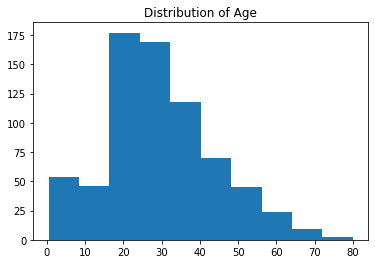

In [158]:
plt.hist(data['Age'])
plt.title('Distribution of Age')
plt.show()

### From the distribution it is understood that Data in age column is right skewed. So we use median to  fill the null values 

In [159]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### As cabin column contains 687 null values (77.1%) that column is dropped.

In [160]:
data=data.drop(['Cabin'],axis=1)

### The Embarked column need to be filled. The Embarked Column is a categorical one so we use mode for filling column

In [161]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [162]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### So all Null values are handled in the data set

***

## 5.Check and handle outliers in at least 3 columns in the dataset


### Checking For Outliers in Age  Column using BoxPlot and IQR Method


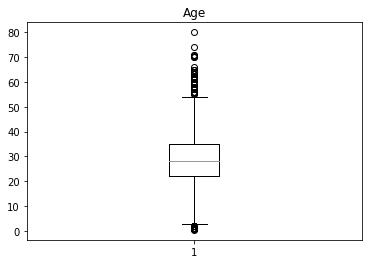

In [163]:
plt.boxplot(data['Age'])
plt.title('Age')
plt.show()

In [164]:
Qu1=np.percentile(data['Age'],25,interpolation='midpoint')
Qu2=np.percentile(data['Age'],50,interpolation='midpoint')
Qu3=np.percentile(data['Age'],75,interpolation='midpoint')

In [165]:
print(Qu1,Qu2,Qu3)

22.0 28.0 35.0


In [166]:
data['Age'].median()

28.0

In [167]:
iqr=Qu3-Qu1
iqr

13.0

In [168]:
low_limit=Qu1-1.5*iqr
up_limit=Qu3+1.5*iqr
print(low_limit,up_limit)

2.5 54.5


In [169]:
outliers1=[]
for i in data['Age']:
    if(i>up_limit) or (i<low_limit):
        outliers1.append(i)

In [170]:
outliers1

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [171]:
len(outliers1)

66

In [172]:
ind1=data['Age']>up_limit
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [173]:
ind2=data['Age']<low_limit
data.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

### The Age Column has 66 outliers and their Indexes are shown above

In [174]:
data1=data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880,8, 17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832])

In [175]:
data1.shape

(825, 10)

### These indexes corresponding to ouliers are dropped from the data set

### Checking For Outliers in SibSp (Number of Siblings/Spouses Aboard)  Column using Boxplot and IQR method

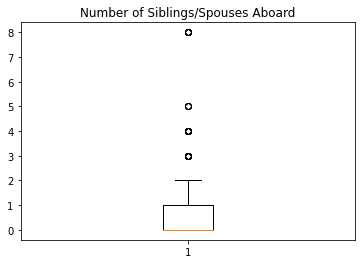

In [176]:
plt.boxplot(data1['SibSp'])
plt.title('Number of Siblings/Spouses Aboard')
plt.show()

In [177]:
Q1=np.percentile(data1['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data1['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data1['SibSp'],75,interpolation='midpoint')

In [178]:
print(Q1,Q2,Q3)

0.0 0.0 1.0


In [179]:
data['SibSp'].median()

0.0

In [180]:
iqr=Q3-Q1
iqr

1.0

In [181]:
low_limit=Q1-1.5*iqr
up_limit=Q3+1.5*iqr
print(low_limit,up_limit)

-1.5 2.5


In [182]:
outliers2=[]
for i in data1['SibSp']:
    if(i>up_limit) or (i<low_limit):
        outliers2.append(i)
outliers2

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [183]:
len(outliers2)

39

In [184]:
ind2=data1['SibSp']>up_limit
data1.loc[ind2].index


Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

### The SibSp(Siblings and passengers abroad) Column has 39 outliers and their Indexes are shown above

In [185]:
data1=data1.drop([25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864])

In [186]:
data1.shape

(786, 10)

### These Indexes corresponding to outliers  are dropped from data set

### Checking For Outliers in survived Column using boxplot

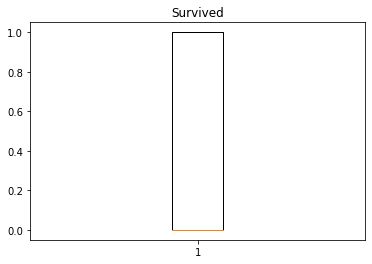

In [187]:
plt.boxplot(data1['Survived'])
plt.title('Survived')
plt.show()

### The Survived Column has no ouliers as shown in boxplot as all values are between 0 and 1

### Checking For Outliers in Passenger class Column using boxplot

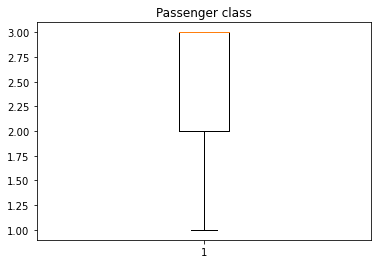

In [188]:
plt.boxplot(data1['Pclass'])
plt.title('Passenger class')
plt.show()

### The Pclass column (Passenger Class) has no outliers. All values are in between 1 and 3

### Checking For Outliers in Fare Column using boxplot and IQR method

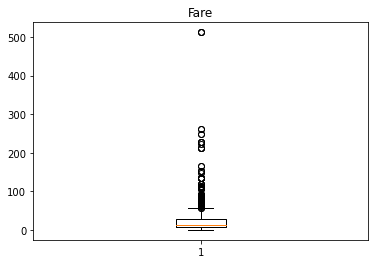

In [189]:
plt.boxplot(data1['Fare'])
plt.title('Fare')
plt.show()

In [190]:
Qua1=np.percentile(data1['Fare'],25,interpolation='midpoint')
Qua2=np.percentile(data1['Fare'],50,interpolation='midpoint')
Qua3=np.percentile(data1['Fare'],75,interpolation='midpoint')

In [191]:
print(Qua1,Qua2,Qua3)

7.8958 13.0 27.75


In [192]:
data1['Fare'].median()

13.0

In [193]:
IQR=Qua3-Qua1
IQR

19.8542

In [194]:
low_lim=Qua1-1.5*IQR
up_lim=Qua3+1.5*IQR
print(low_lim,up_lim)

-21.885499999999997 57.5313


In [195]:
outliers3=[]
for i in data1['Fare']:
    if(i>up_lim) or (i<low_lim):
        outliers3.append(i)
outliers3

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [196]:
len(outliers3)

102

### The Fare Column has 102 outliers

In [197]:
ind3=data1['Fare']>up_lim
out1=data1.loc[ind3].index


In [198]:
data1=data1.drop(out1)

In [199]:
data1.shape

(684, 10)

### These  102 outliers are dropped from data set 



### Finally the total rows are reduced to 684 after all the  steps in outliers handling

***

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

### Finding the data types of all columns

In [200]:
data1.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

### Importing the preprocessing libraries

In [201]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

### Creating data set with Numerical columns only

In [202]:
X1=data1.drop(['Name', 'Sex', 'Ticket','Embarked'],axis=1)

In [203]:
X1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,28.0,0,0,8.4583


### Splitting The Numerical data set into Feature and target

In [204]:
#Feature Data set
X=X1.drop('Survived',axis=1)

#Target column
Y=X1['Survived']

## MIN MAX SCALING

In [205]:
min_max_scalar=preprocessing.MinMaxScaler(feature_range=(0,1))

In [206]:
X=min_max_scalar.fit_transform(X)

In [207]:
type(X)

numpy.ndarray

In [208]:
X=pd.DataFrame(X1,columns=['Pclass','Age','SibSp','Parch','Fare'])

In [209]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583


### All values in  the feature data set is scaled according to min max scaling with values ranging from 0 to 1

### Creating the model to test the scaled data set

In [210]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [211]:
from sklearn import linear_model

In [212]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [213]:
print('The mean squared error values is:',mean_squared_error(Y_test,predictions))
print('the r squared value is',r2_score(Y_test,predictions))

The mean squared error values is: 0.19622876673185494
the r squared value is 0.1201582124247047


### The mean squared error value is 0.19 which is a smaller value. So the model is created is a good one.

***
***